# Diabetes Prediction using Artificial Neural Networks
***

**Diabetes** is a chronic medical condition that affects how the body regulates blood sugar (glucose), leading to high levels of glucose in the bloodstream. This condition occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Diabetes can lead to serious health complications, including heart disease, kidney failure, nerve damage, and vision problems.

Diabetes significantly impacts the quality of life of individuals by imposing daily self-management routines, dietary restrictions, and regular monitoring of blood sugar levels. Physical complications and the mental stress of managing the disease can affect overall well-being, productivity, and long-term health.

In this project, we aim to predict if a person has diabetes using an artificial neural network. We’ll train the model on the Pima Indians Diabetes Database, a dataset containing medical information about individuals of Pima Indian heritage. This database includes various health metrics, such as glucose levels and blood pressure, which help the model learn patterns associated with diabetes. The prediction model will provide a valuable tool in early diabetes detection, potentially guiding people toward timely medical consultation and lifestyle adjustments.

**TensorFlow** is an open-source deep learning framework developed by Google, widely used for building and deploying machine learning models. It provides a flexible and comprehensive ecosystem for handling data, designing models, and training and deploying neural networks. TensorFlow is especially known for its powerful support of computational graphs and GPU acceleration, making it highly efficient for large-scale deep learning tasks.

**Keras** is a high-level neural networks API integrated into TensorFlow, designed to enable fast experimentation with deep learning models. It offers a user-friendly, modular approach to building neural networks, allowing users to create and train models with a few simple lines of code. Keras abstracts much of the complexity of TensorFlow, making it accessible for beginners while still providing powerful tools for advanced model building.

In this project, we’ll use Keras within TensorFlow to simplify the development of neural networks, focusing on building, training, and evaluating models with ease.

In [1]:
!pip install tensorflow  

#### Installing Necessary Libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Pima Indians Diabetes Dataset
***

In [3]:
diabetes=pd.read_csv('diabetes.csv')  

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Pima Indians Diabetes Database

The **Pima Indians Diabetes Database** is a medical dataset used to predict the likelihood of diabetes in individuals based on various health metrics. Here’s a description of each feature in the dataset:

1. **Pregnancies**: The number of times the person has been pregnant. This feature is often used as a predictive factor for diabetes in women.

2. **Glucose**: Plasma glucose concentration measured after a 2-hour oral glucose tolerance test. Higher glucose levels can indicate diabetes.

3. **BloodPressure**: Diastolic blood pressure (mm Hg). High blood pressure is a common condition associated with diabetes.

4. **SkinThickness**: The thickness of the triceps skinfold, measured in millimeters, used as an indirect measure of body fat.

5. **Insulin**: Serum insulin level after 2 hours (mu U/ml). Insulin resistance is a key feature of diabetes, so this level is crucial in prediction.

6. **BMI (Body Mass Index)**: BMI, calculated as weight (kg) / (height (m))^2. BMI is a known risk factor for diabetes, with higher values generally indicating greater risk.

7. **DiabetesPedigreeFunction**: A score that represents diabetes likelihood based on family history. Higher values suggest a stronger hereditary risk of diabetes.

8. **Age**: Age in years. Age can influence the risk of diabetes, as risk generally increases with age.

9. **Outcome**: The target variable, where `1` indicates the presence of diabetes and `0` indicates no diabetes. This is the label the model will predict.

The dataset provides a balanced set of features commonly associated with diabetes, allowing an **artificial neural network** to learn patterns and relationships between these health indicators and the likelihood of diabetes (Outcome).


## Data Visualisation

 Count plot using Seaborn to visualise the distribution of diabetic and non-diabetic individuals in the dataset. 

C:\Users\navbc\AppData\Local\Temp\ipykernel_21188\2170859240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes, palette=['green', 'red'])


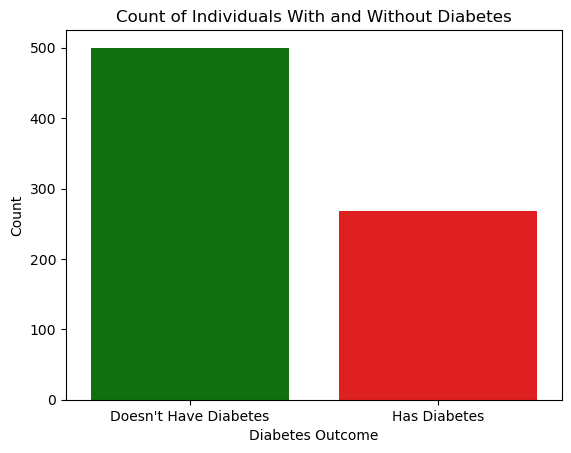

In [7]:
sns.countplot(x='Outcome', data=diabetes, palette=['green', 'red'])
plt.xticks([0, 1], ['Doesn\'t Have Diabetes', 'Has Diabetes'])
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.title('Count of Individuals With and Without Diabetes')
plt.show()

***
The code below creates a **pair plot** using Seaborn to visualize relationships between various health metrics in the diabetes dataset. 

- `hue='Outcome'` colors the data points by the `Outcome` variable, where **0** (doesn’t have diabetes) is shown in **green** and **1** (has diabetes) is shown in **red**.

This plot helps in exploring how different features relate to each other and how they may differ for individuals with and without diabetes.


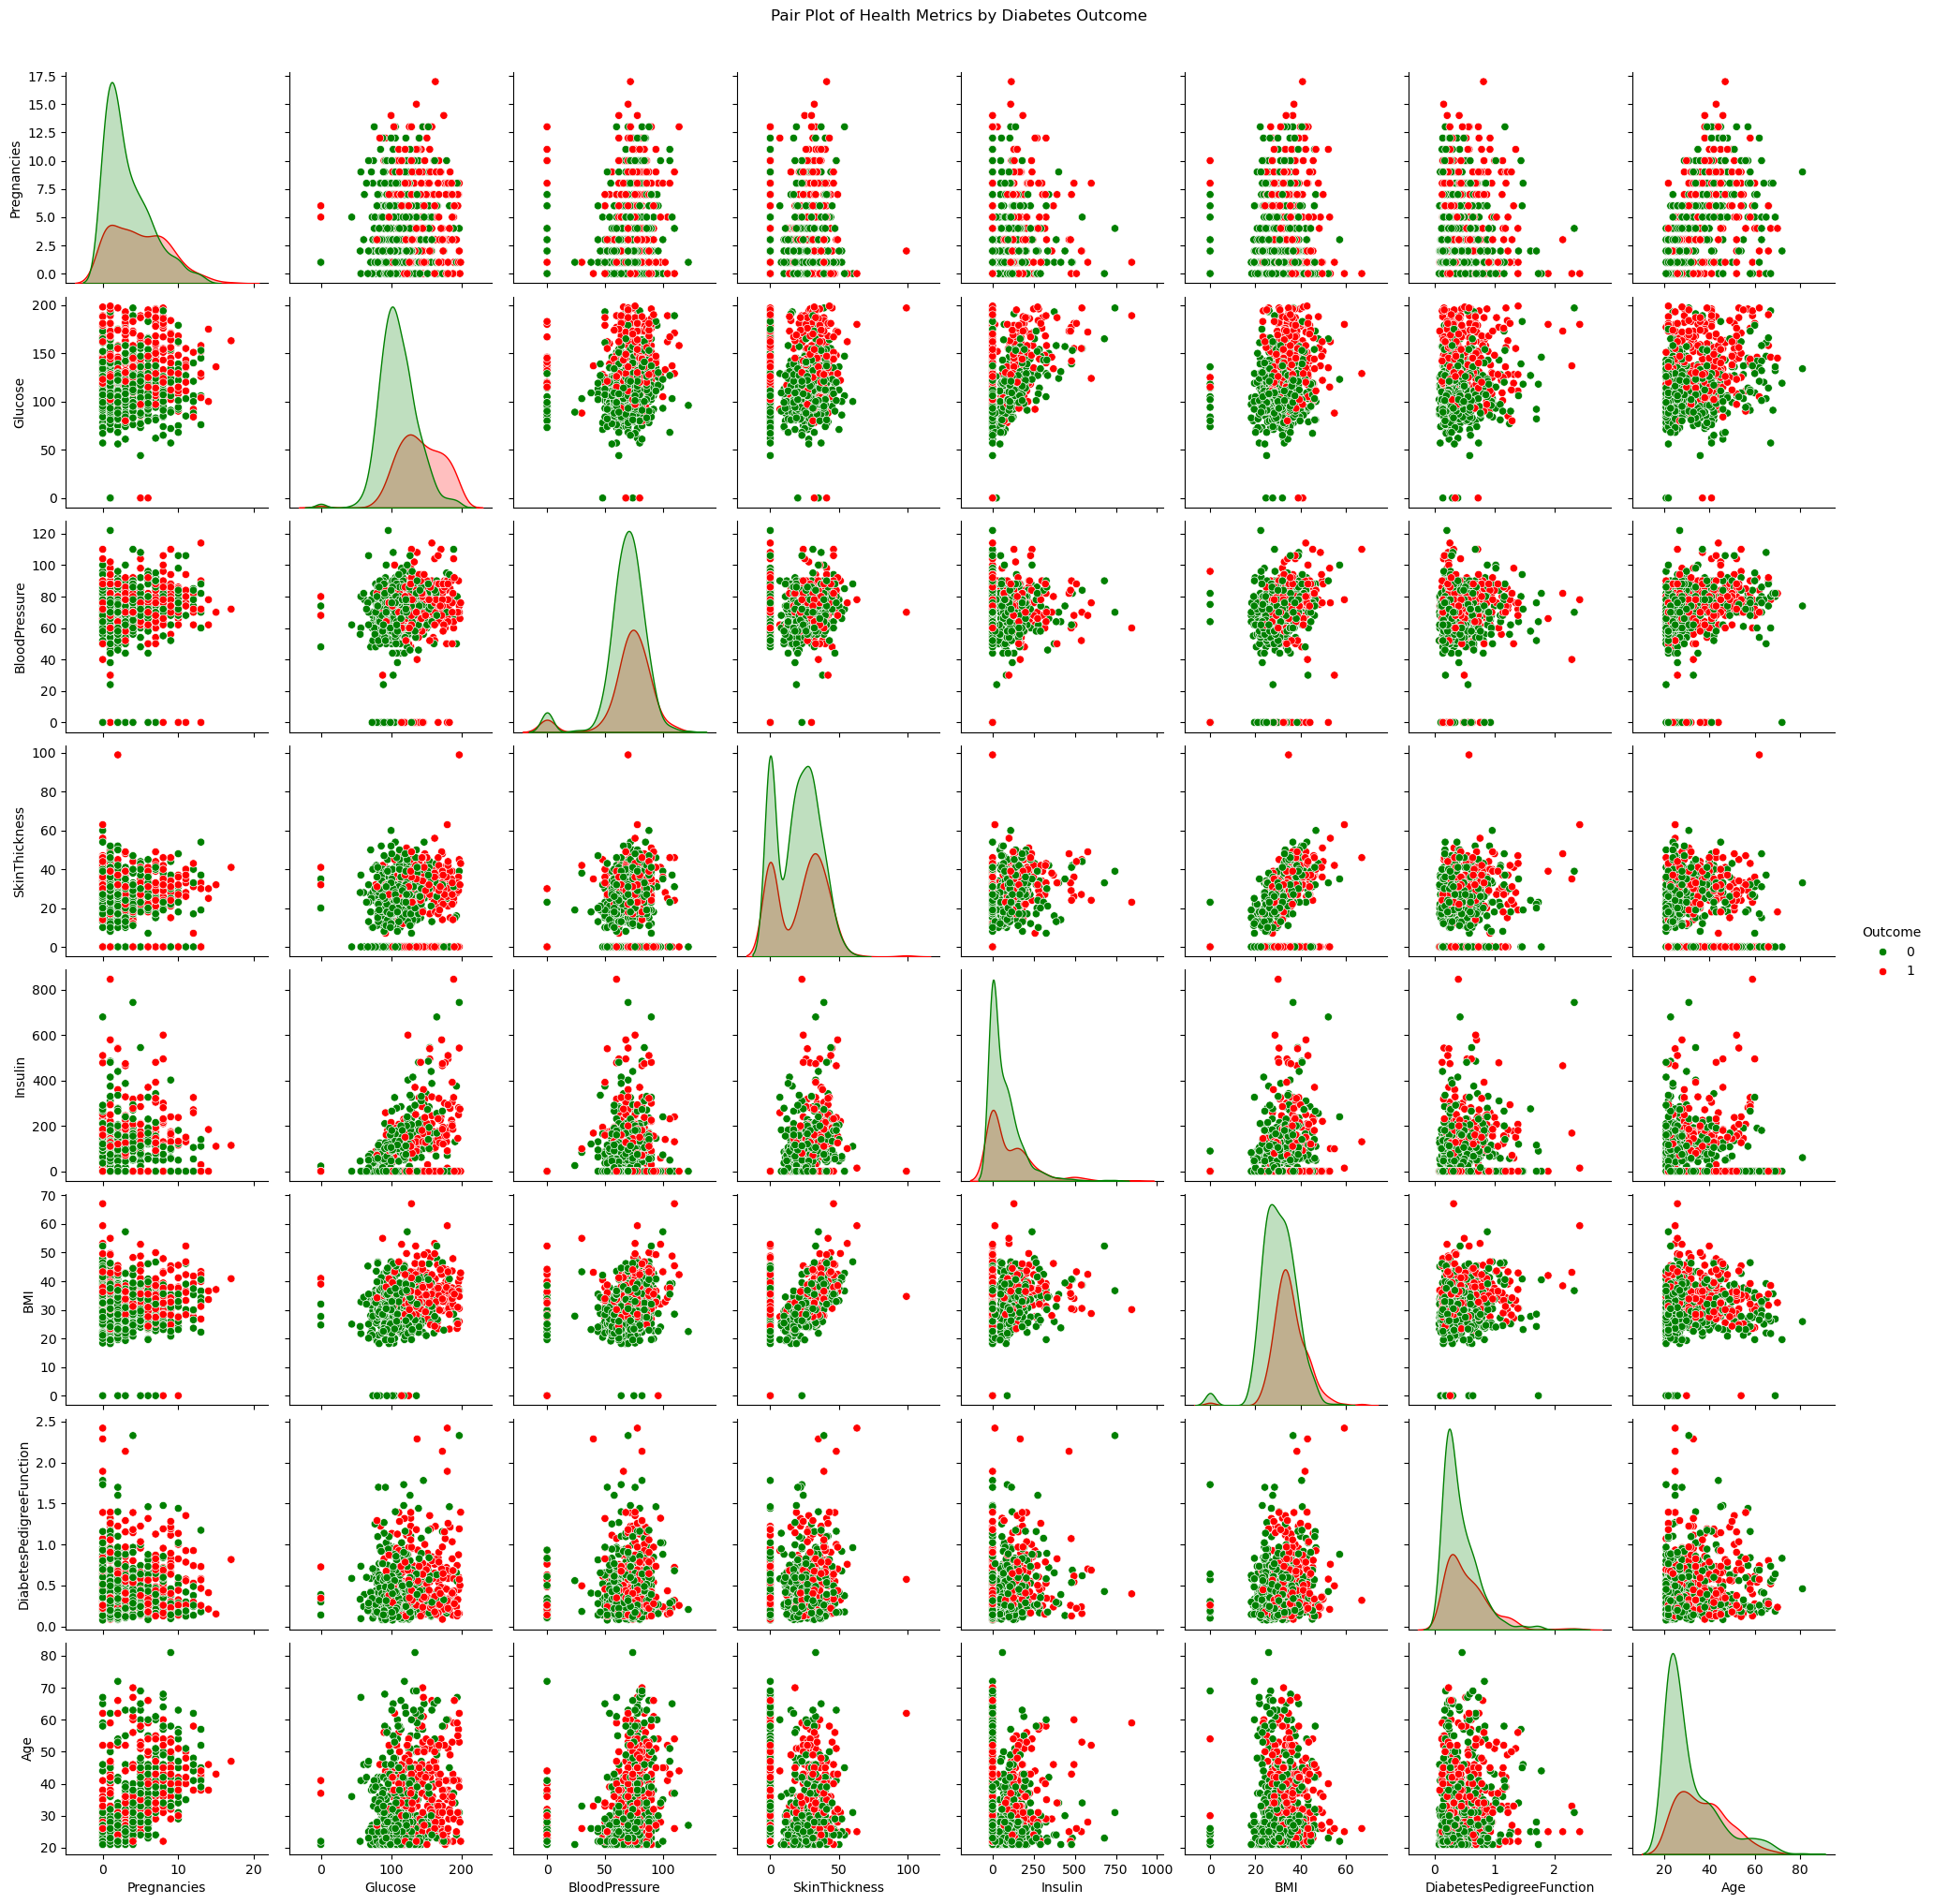

In [8]:
sns.pairplot(diabetes, hue='Outcome', vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                                            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
             palette={0: 'green', 1: 'red'})
plt.suptitle('Pair Plot of Health Metrics by Diabetes Outcome', y=1.02)  # Adjust title position
plt.show()

## Data Preprocessing

In [9]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


The code `X = diabetes.iloc[:, 0:8].values` extracts the feature variables from the `diabetes` dataset.

- `diabetes.iloc[:, 0:8]` selects all rows and columns 0 through 7 (inclusive), representing the first 8 columns (features) in the dataset.
- `.values` converts the selected DataFrame slice into a NumPy array, storing it in `X`.

This variable `X` now holds the feature data, which will be used as input for model training.


In [10]:
X = diabetes.iloc[:, 0:8].values

In [11]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

The code above standardises the feature data `X` using **scikit-learn's StandardScaler** to prepare it for training an artificial neural network (ANN).

1. `from sklearn.preprocessing import StandardScaler` imports the StandardScaler class, which is commonly used for feature scaling.
2. `sc = StandardScaler()` initializes the scaler.
3. `X = sc.fit_transform(X)`:
   - `fit_transform` computes the mean and standard deviation of each feature in `X` and scales them accordingly.
   - This transforms `X` so that it has a mean of 0 and a standard deviation of 1, which is beneficial for neural networks. Standardized data helps neural networks converge faster and perform better, as it ensures that all input features are on a similar scale.

Standardising inputs is essential for training ANNs effectively, as it prevents certain features from dominating the learning process.

In [13]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [14]:
y = diabetes.iloc[:, 8].values  # extracts the target variable 'Outcome' from the dataset.

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Building an Artificial Neural Network (ANN) Model with TensorFlow and Keras

In this section, we define and construct an Artificial Neural Network (ANN) model using **TensorFlow** and **Keras**. The model structure includes:

1. **Input Layer**: Accepts 8 features as input.
2. **Hidden Layers**: Two fully connected (Dense) layers with 500 units each, using ReLU activation for non-linearity.
   - Each hidden layer is followed by a **Dropout layer** (rate of 0.2) to prevent overfitting by randomly setting a fraction of input units to 0 during training.
3. **Output Layer**: A single unit with sigmoid activation, designed for binary classification (predicting diabetes presence or absence).

This model setup leverages **Keras** within **TensorFlow** to build a flexible and efficient neural network for binary classification tasks.


In [16]:

ANN_model = tf.keras.models.Sequential()

ANN_model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(8, )))
ANN_model.add(tf.keras.layers.Dropout(0.2))

ANN_model.add(tf.keras.layers.Dense(units=500, activation='relu'))
ANN_model.add(tf.keras.layers.Dropout(0.2))


ANN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


C:\Users\navbc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
ANN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │           4,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 255,501 (998.05 KB)

 Trainable params: 255,501 (998.05 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
ANN_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

The code above configures the ANN model for training by specifying the optimizer, loss function, and evaluation metrics.

- **`optimizer='Adam'`**: Uses the Adam optimization algorithm, which is efficient and commonly used in training neural networks.
- **`loss='binary_crossentropy'`**: Sets the loss function to binary cross-entropy, suitable for binary classification tasks (like predicting diabetes presence or absence).
- **`metrics=['accuracy']`**: Specifies accuracy as the evaluation metric to track the model's performance during training and testing.

In [19]:
class_weight = {0: 1, 1: 2}  # Adjust based on imbalance
epochs_hist=ANN_model.fit(X_train,y_train,epochs=200,class_weight=class_weight) #- **`epochs=250`**: Sets the number of training epochs to 300, meaning the model will go through the entire training dataset 300 times to optimise its weights.

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6302 - loss: 0.8118
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.6363
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7541 - loss: 0.6408 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7492 - loss: 0.6440
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8104 - loss: 0.5750
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.6284 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.5698 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7535 - loss: 0.6813 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - loss: 0.6044
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.6107
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.5560 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [20]:
y_pred=ANN_model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [21]:
y_pred = (y_pred > 0.5)

In [22]:
y_pred

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [23]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss'])

The below code plots the **training loss** of the model over the training epochs to visualize the model's learning progress.

- **`plt.plot(epochs_hist.history['loss'])`**: Plots the loss values recorded at each epoch during training.

This plot helps in understanding how the model’s loss decreases (or stabilises) as training progresses, which is useful for assessing model convergence.

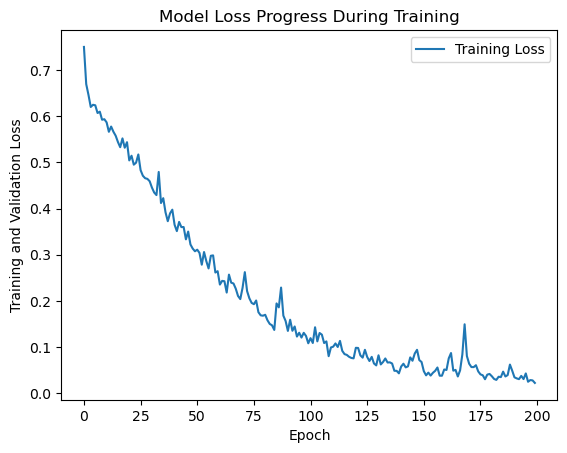

In [24]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

The code below generates a **confusion matrix** to evaluate the performance of the model on the test data and visualises it as a heatmap.

<Axes: >

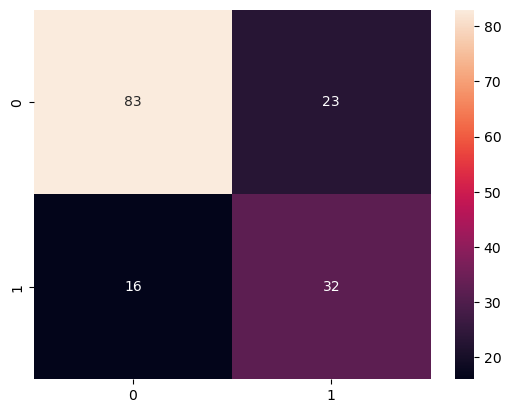

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

The code below generates a **classification report** to provide a detailed summary of the model's performance metrics.

   - **Precision**: The proportion of true positive predictions out of all positive predictions made by the model.
   - **Recall**: The proportion of true positive predictions out of all actual positive cases.
   - **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure.
   - **Support**: The number of actual occurrences of each class in `y_test`.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       106
           1       0.58      0.67      0.62        48

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.76      0.75      0.75       154



The model achieves an accuracy of 75% overall, showing that it performs fairly well in distinguishing between individuals with and without diabetes.

***